# Machine Learning Use Case "Surface Type Classification"
## Section A - Introduction

Q1 - What kind of data we have?


Q2 - What kind of objective we have?

Q3 - Is there a specific Methodology to follow? OSEMN

## Section B - Rsearch Questions:

RQ1 - What are the main features that help in detecting the surface type? 

RQ2 - How to use these features to classify the surface type? 

RQ3 - How to evaluate the reliability of the model?

## Section C - Research Objectives

RO1 - Utilize IoT sensors to capture x, y, z accelerometer and x, y, z gyroscope data.

RO2 - Employ machine learning techniques to understand patterns and classify surfaces accordingly. 

RO3 - Perform a train-test split to evaluate the performance of the model. 

## Section D - Research Methodology

## Section E - Exploratory Data Analysis (EDA)

#### Section E-1 Loading data


In [2]:
# Import necessary libraries
import pandas as pd # For data frame reading/manipulation
import numpy as np # For mathematical calculations
import matplotlib.pyplot as plt # For plotting

In [3]:
# Grass Slopy Wet Surface DataFrame
GSW = pd.read_csv('/Users/salahkaf/Desktop/Masters_Project/24_grass_slopy_wet.csv', header = None) # Setting header as 'None' because the data does not have the column names

# Asphalt Flat Wet Surface DataFrame
AFW = pd.read_csv('/Users/salahkaf/Desktop/Masters_Project/22_asphalt_flat_wet.csv', header = None) 

# Concerete Dry Flat Surface DataFrame
CDF = pd.read_csv('/Users/salahkaf/Desktop/Masters_Project/17_concrete_dry_flat.csv', header = None) 

# Stones Coarse Wet Surface DataFrame
SCW = pd.read_csv('/Users/salahkaf/Desktop/Masters_Project/14_stones_coarse_wet.csv', header = None)

# Tile Smooth Surface DataFrame
TS = pd.read_csv('/Users/salahkaf/Desktop/Masters_Project/11_tile_smooth.csv', header = None)

In [4]:
# Defining the dictionary of tables we have to easily access them later on

# Dictionary = {'key':'Item'}
dict_of_tables = {'GSW': GSW, 'AFW': AFW, 'CDF': CDF, 'SCW': SCW, 'TS': TS}

#### Section E-2 Defining Columns names


In [5]:
# for table_name, table in dict_of_tables.items():
#     print(table)

In [6]:
# Define column names
column_names = ['Timestamp', 'x-accelerometer', 'y-accelerometer','z-accelerometer',
               'x-gyroscope','y-gyroscope','z-gyroscope']

# Iterate over each DataFrame in the dictionary and apply the code
for table_name, table in dict_of_tables.items():
    # Assign column names to the DataFrame
    table.columns = column_names

#### Section E-3 Exploring head and tail of each table


In [7]:
# # Exploring head and tail of each table
# print('The top 3 rows of GSW are')
# display(GSW.head(3))

# print('The last 3 rows of GSW are')
# display(GSW.tail(3))

# print('-'*25) # Segmenting between tables

# print('The top 3 rows of AFW are')
# display(AFW.head(3))

# print('The last 3 rows of AFW are')
# display(AFW.tail(3))

# print('-'*25) 
# print('The top 3 rows of CDF are')
# display(CDF.head(3))

# print('The last 3 rows of CDF are')
# display(CDF.tail(3))

# print('-'*25) 

# print('The top 3 rows of GMS are')
# display(GMS.head(3))

# print('The last 3 rows of GMS are')
# display(GMS.tail(3))

# print('-'*25) 

# print('The top 3 rows of CDB are')
# display(CDB.head(3))

# print('The last 3 rows of CDB are')
# display(CDB.tail(3))

# print('-'*25) 

# print('The top 3 rows of ADF are')
# display(ADF.head(3))

# print('The last 3 rows of ADF are')
# display(ADF.tail(3))

# print('-'*25) 


# print('The top 3 rows of TM are')
# display(TM.head(3))

# print('The last 3 rows of TM are')
# display(TM.tail(3))

In [8]:
# Iterate over each DataFrame in the dictionary and print head and tail
for table_name, table in dict_of_tables.items():
    
    print(f'The top 3 rows of {table_name} are')
    display(table.head(3))
    
    print(f'The last 3 rows of {table_name} are')
    display(table.tail(3))
    
    print('-'*50) # Segmenting between tables


The top 3 rows of GSW are


Timestamp  x-accelerometer  y-accelerometer  z-accelerometer  \
0  2024-03-21 13:46:48.330        -0.049316        -0.229492        -0.989746   
1  2024-03-21 13:46:48.340        -0.036865        -0.238770        -0.980957   
2  2024-03-21 13:46:48.349        -0.037842        -0.240479        -0.977051   

   x-gyroscope  y-gyroscope  z-gyroscope  
0     1.663208    -0.289917     0.381470  
1     1.678467    -0.396728     0.106812  
2     1.785278    -0.442505    -0.045776

The last 3 rows of GSW are


Timestamp  x-accelerometer  y-accelerometer  \
6037  2024-03-21 13:47:48.569         0.007324        -0.151611   
6038  2024-03-21 13:47:48.580         0.004639        -0.156250   
6039  2024-03-21 13:47:48.590         0.002197        -0.157959   

      z-accelerometer  x-gyroscope  y-gyroscope  z-gyroscope  
6037        -0.999023     0.869751     0.137329     0.289917  
6038        -0.997070     0.778198     0.122070     0.152588  
6039        -0.997559     0.885010     0.091553     0.061035

--------------------------------------------------
The top 3 rows of AFW are


Timestamp  x-accelerometer  y-accelerometer  z-accelerometer  \
0  2024-03-20 10:27:23.329         0.007080        -0.037842        -1.012207   
1  2024-03-20 10:27:23.340         0.006592        -0.036865        -1.011963   
2  2024-03-20 10:27:23.350         0.001953        -0.037354        -1.006592   

   x-gyroscope  y-gyroscope  z-gyroscope  
0     0.717163     0.289917     0.000000  
1     0.671387     0.244141     0.076294  
2     0.778198     0.198364    -0.030518

The last 3 rows of AFW are


Timestamp  x-accelerometer  y-accelerometer  \
8877  2024-03-20 10:28:51.910         0.013672        -0.075928   
8878  2024-03-20 10:28:51.920         0.014648        -0.074951   
8879  2024-03-20 10:28:51.930         0.012207        -0.076172   

      z-accelerometer  x-gyroscope  y-gyroscope  z-gyroscope  
8877        -1.005859     0.686645     0.259399     0.061035  
8878        -1.007080     0.732422     0.259399     0.076294  
8879        -1.008789     0.671387     0.350952     0.122070

--------------------------------------------------
The top 3 rows of CDF are


Timestamp  x-accelerometer  y-accelerometer  z-accelerometer  \
0  2024-03-20 10:03:39.330        -0.012451        -0.043945        -1.011230   
1  2024-03-20 10:03:39.340        -0.015625        -0.044922        -1.010498   
2  2024-03-20 10:03:39.349        -0.016357        -0.044922        -1.009521   

   x-gyroscope  y-gyroscope  z-gyroscope  
0     0.747681     0.228882     0.061035  
1     0.717163     0.167847     0.000000  
2     0.671387     0.274658    -0.091553

The last 3 rows of CDF are


Timestamp  x-accelerometer  y-accelerometer  \
7997  2024-03-20 10:04:59.130        -0.020264        -0.045166   
7998  2024-03-20 10:04:59.139        -0.020752        -0.043457   
7999  2024-03-20 10:04:59.150        -0.022705        -0.042969   

      z-accelerometer  x-gyroscope  y-gyroscope  z-gyroscope  
7997        -1.010010     0.747681     0.350952     0.000000  
7998        -1.008789     0.762939     0.381470    -0.061035  
7999        -1.007324     0.717163     0.396728    -0.030518

--------------------------------------------------
The top 3 rows of SCW are


Timestamp  x-accelerometer  y-accelerometer  z-accelerometer  \
0  2024-03-20 09:47:20.329        -0.066895        -0.076416        -1.004883   
1  2024-03-20 09:47:20.340        -0.072021        -0.081543        -1.003418   
2  2024-03-20 09:47:20.350        -0.076416        -0.080078        -1.003174   

   x-gyroscope  y-gyroscope  z-gyroscope  
0     0.640869     0.320435     0.015259  
1     0.778198     0.274658    -0.030518  
2     0.762939     0.183105     0.015259

The last 3 rows of SCW are


Timestamp  x-accelerometer  y-accelerometer  \
9917  2024-03-20 09:48:59.290        -0.097656        -0.060791   
9918  2024-03-20 09:48:59.299        -0.097168        -0.061035   
9919  2024-03-20 09:48:59.310        -0.097900        -0.060791   

      z-accelerometer  x-gyroscope  y-gyroscope  z-gyroscope  
9917        -1.002930     0.823975     0.152588     0.045776  
9918        -1.001953     0.778198     0.183105     0.000000  
9919        -1.002197     0.610352     0.228882     0.030518

--------------------------------------------------
The top 3 rows of TS are


Timestamp  x-accelerometer  y-accelerometer  z-accelerometer  \
0  2024-03-20 09:34:52.330        -0.004883        -0.042969        -1.011230   
1  2024-03-20 09:34:52.340        -0.005859        -0.042236        -1.008057   
2  2024-03-20 09:34:52.349        -0.004883        -0.042480        -1.009521   

   x-gyroscope  y-gyroscope  z-gyroscope  
0     0.671387     0.320435     0.045776  
1     0.671387     0.259399     0.000000  
2     0.671387     0.213623    -0.106812

The last 3 rows of TS are


Timestamp  x-accelerometer  y-accelerometer  \
6677  2024-03-20 09:35:58.970        -0.003662        -0.049805   
6678  2024-03-20 09:35:58.979        -0.003662        -0.048096   
6679  2024-03-20 09:35:58.990        -0.002930        -0.048828   

      z-accelerometer  x-gyroscope  y-gyroscope  z-gyroscope  
6677        -1.006592     0.610352     0.427246    -0.091553  
6678        -1.009521     0.595093     0.442505    -0.015259  
6679        -1.008301     0.656128     0.320435    -0.320435

--------------------------------------------------


#### Section E-4 Checking datatype


In [9]:
# We will loop through each table to find the datatypes of the columns

for table_name, table in dict_of_tables.items():
    print('The table name is', table_name)
    print('table info is')
    display(table.info())
    print('-'*50)

The table name is GSW
table info is
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Timestamp        6040 non-null   object 
 1   x-accelerometer  6040 non-null   float64
 2   y-accelerometer  6040 non-null   float64
 3   z-accelerometer  6040 non-null   float64
 4   x-gyroscope      6040 non-null   float64
 5   y-gyroscope      6040 non-null   float64
 6   z-gyroscope      6040 non-null   float64
dtypes: float64(6), object(1)
memory usage: 330.4+ KB


None

--------------------------------------------------
The table name is AFW
table info is
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8880 entries, 0 to 8879
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Timestamp        8880 non-null   object 
 1   x-accelerometer  8880 non-null   float64
 2   y-accelerometer  8880 non-null   float64
 3   z-accelerometer  8880 non-null   float64
 4   x-gyroscope      8880 non-null   float64
 5   y-gyroscope      8880 non-null   float64
 6   z-gyroscope      8880 non-null   float64
dtypes: float64(6), object(1)
memory usage: 485.8+ KB


None

--------------------------------------------------
The table name is CDF
table info is
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Timestamp        8000 non-null   object 
 1   x-accelerometer  8000 non-null   float64
 2   y-accelerometer  8000 non-null   float64
 3   z-accelerometer  8000 non-null   float64
 4   x-gyroscope      8000 non-null   float64
 5   y-gyroscope      8000 non-null   float64
 6   z-gyroscope      8000 non-null   float64
dtypes: float64(6), object(1)
memory usage: 437.6+ KB


None

--------------------------------------------------
The table name is SCW
table info is
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9920 entries, 0 to 9919
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Timestamp        9920 non-null   object 
 1   x-accelerometer  9920 non-null   float64
 2   y-accelerometer  9920 non-null   float64
 3   z-accelerometer  9920 non-null   float64
 4   x-gyroscope      9920 non-null   float64
 5   y-gyroscope      9920 non-null   float64
 6   z-gyroscope      9920 non-null   float64
dtypes: float64(6), object(1)
memory usage: 542.6+ KB


None

--------------------------------------------------
The table name is TS
table info is
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6680 entries, 0 to 6679
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Timestamp        6680 non-null   object 
 1   x-accelerometer  6680 non-null   float64
 2   y-accelerometer  6680 non-null   float64
 3   z-accelerometer  6680 non-null   float64
 4   x-gyroscope      6680 non-null   float64
 5   y-gyroscope      6680 non-null   float64
 6   z-gyroscope      6680 non-null   float64
dtypes: float64(6), object(1)
memory usage: 365.4+ KB


None

--------------------------------------------------


In [10]:
# We noticed that the first column 'Timestamp' Dtype is 'object'

#### Section E-5 Fixing 'Timestamp' column datatype into timestamp



In [11]:
for table_name, table in dict_of_tables.items():
    table['Timestamp'] = pd.to_datetime(table['Timestamp']) # using pandas functionality to correct 'Timestamp' column datatype


In [12]:
# randomly checking of one of the tables
GSW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Timestamp        6040 non-null   datetime64[ns]
 1   x-accelerometer  6040 non-null   float64       
 2   y-accelerometer  6040 non-null   float64       
 3   z-accelerometer  6040 non-null   float64       
 4   x-gyroscope      6040 non-null   float64       
 5   y-gyroscope      6040 non-null   float64       
 6   z-gyroscope      6040 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 330.4 KB


#### Section E-6 Sorting by timestamp

In [13]:
for table_name, table in dict_of_tables.items():

    table.sort_values(by='Timestamp', inplace=True) # Sort the table by 'Timestamp' column #Using 'inplace' Argument to apply the changes on the same table

    # Resetting the index after sorting
    table.reset_index(drop=True, inplace=True)



#### Section E-7 Removing 20 seconds (noise at start and ending)

In [14]:
# testing_table = dict_of_tables['GSW']
# testing_table.columns[0]

In [15]:
# testing_table['Timestamp']

In [16]:
# Looping through 'dict_of_tables' that is containing DataFrames

for table_name, table in dict_of_tables.items():
    # Accessing 'Timestamp' column, which is the first column
    timestamp_column = table.columns[0]
    
    # Calculate 20 seconds
    time_delta = pd.Timedelta(seconds=20)
    
    # Filter out the first and last 20 seconds
    filtered_data = table[(table[timestamp_column] >= (table[timestamp_column].iloc[0] + time_delta)) &
                               (table[timestamp_column] <= (table[timestamp_column].iloc[-1] - time_delta))]
    
    # Update the dictionary with filtered data
    dict_of_tables[table_name] = filtered_data


#### Section E-7.5 Exporting the trimmed datasets 

In [17]:
!pwd # checking path working directory 

/Users/salahkaf


In [18]:
import os

# Highlight the folder path
save_path = '/Users/salahkaf/Desktop/Masters_Project/Bushra/'

# Iterate through each key-value pair in the dictionary
for table_name, table in dict_of_tables.items():
    # Define the file name for the CSV
    file_name = f"{table_name}_trimmed.csv"
    # Define the file path
    file_path = os.path.join(save_path, file_name)
    
    # Export the DataFrame to a CSV file
    table.to_csv(file_path, index=False)
    
    print(f"Table '{table_name}' exported to '{file_name}' in path '{save_path}'")


Table 'GSW' exported to 'GSW_trimmed.csv' in path '/Users/salahkaf/Desktop/Masters_Project/Bushra/'
Table 'AFW' exported to 'AFW_trimmed.csv' in path '/Users/salahkaf/Desktop/Masters_Project/Bushra/'
Table 'CDF' exported to 'CDF_trimmed.csv' in path '/Users/salahkaf/Desktop/Masters_Project/Bushra/'
Table 'SCW' exported to 'SCW_trimmed.csv' in path '/Users/salahkaf/Desktop/Masters_Project/Bushra/'
Table 'TS' exported to 'TS_trimmed.csv' in path '/Users/salahkaf/Desktop/Masters_Project/Bushra/'


#### Section E-8 Create first 10 seconds tables

In [19]:
# firstTimestamp = testing_table['Timestamp'].iloc[0]
# ten_seconds_later = firstTimestamp + pd.Timedelta(seconds=10)

# firstTimestamp
# ten_seconds_later
# testing_table[testing_table['Timestamp'] <= ten_seconds_later]

In [20]:
# dict_of_tables_10_seconds

In [21]:
# for table_name, table in dict_of_tables_10_seconds.items():
#     print(table_name)

In [22]:
dict_of_tables_10_seconds = {} # Creating an empty dictionary to fill it up with 10_seconds tables

# looping through the dictionary of tables
for table_name, table in dict_of_tables.items():

    # get the starting timestamp
    first_timestamp = table['Timestamp'].iloc[0]  # Get the first timestamp
    
    ten_seconds_after_first_timestamp = first_timestamp + pd.Timedelta(seconds=10)  # Calculate 10 seconds after the first timestamp
    first_10_seconds = table[table['Timestamp'] <= ten_seconds_after_first_timestamp]  # Select rows up to 10 seconds after the first timestamp
    dict_of_tables_10_seconds[table_name] = first_10_seconds # Storing the new filtered tables into the new dictionary


In [23]:
# chkecing a random table in the dict_of_tables_5_seconds
# dict_of_tables_10_seconds['ADF']

#### Section E-9 Plotting the first 10 seconds

In [24]:
print('The tables are:')
for item, key in dict_of_tables_10_seconds.items():
    print(item)


The tables are:
GSW
AFW
CDF
SCW
TS


In [25]:
# Regular Method trying on GSW

In [26]:
# # Creating a figure and a set of subplots with 6 rows and 1 column, adjusting the figure size and spacing between subplots
# fig, ax = plt.subplots(6, 1, figsize=(13, 30), gridspec_kw={'hspace': 0.4})

# # Iterating over each feature column (excluding the timestamp column) in the 'GSW' DataFrame
# for i, feature in enumerate(dict_of_tables_10_seconds['GSW'].columns[1:], 0):
    
#     # Plotting the feature against the timestamp for the 'GSW' DataFrame, with a green color
#     ax[i].plot(dict_of_tables_10_seconds['GSW']['Timestamp'], dict_of_tables_10_seconds['GSW'][feature], color='green')
    
#     # Setting the title for each subplot indicating the DataFrame name ('GSW') and the specific feature being plotted
#     ax[i].set_title('GSW ' + feature)
    
#     # Setting the x-axis label for each subplot
#     ax[i].set_xlabel('Timestamp')
    
#     # Setting the y-axis label for each subplot
#     ax[i].set_ylabel(feature)

# # Displaying the plot
# plt.show()


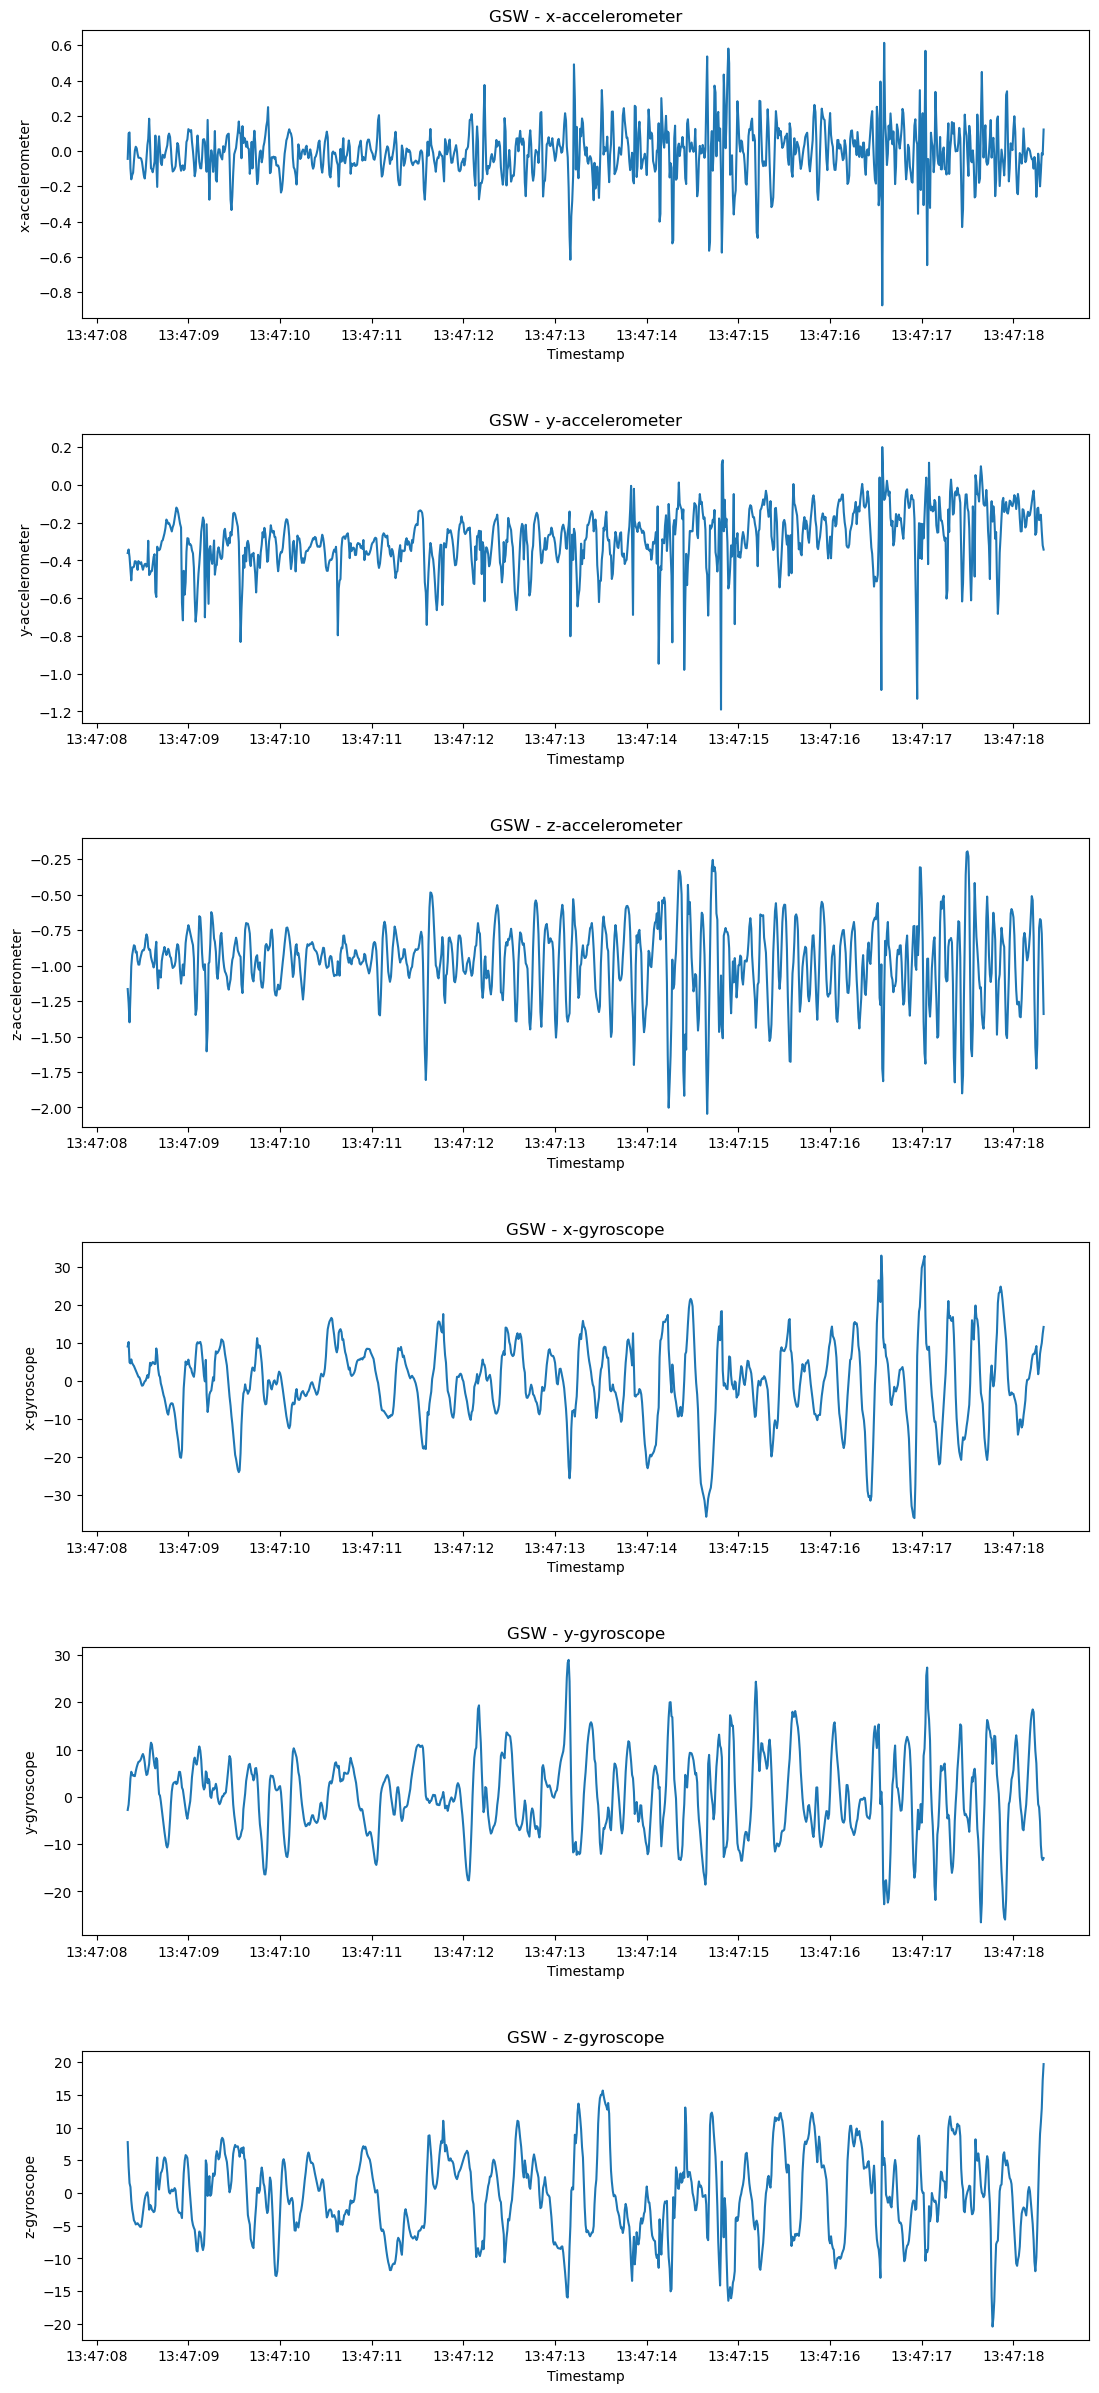

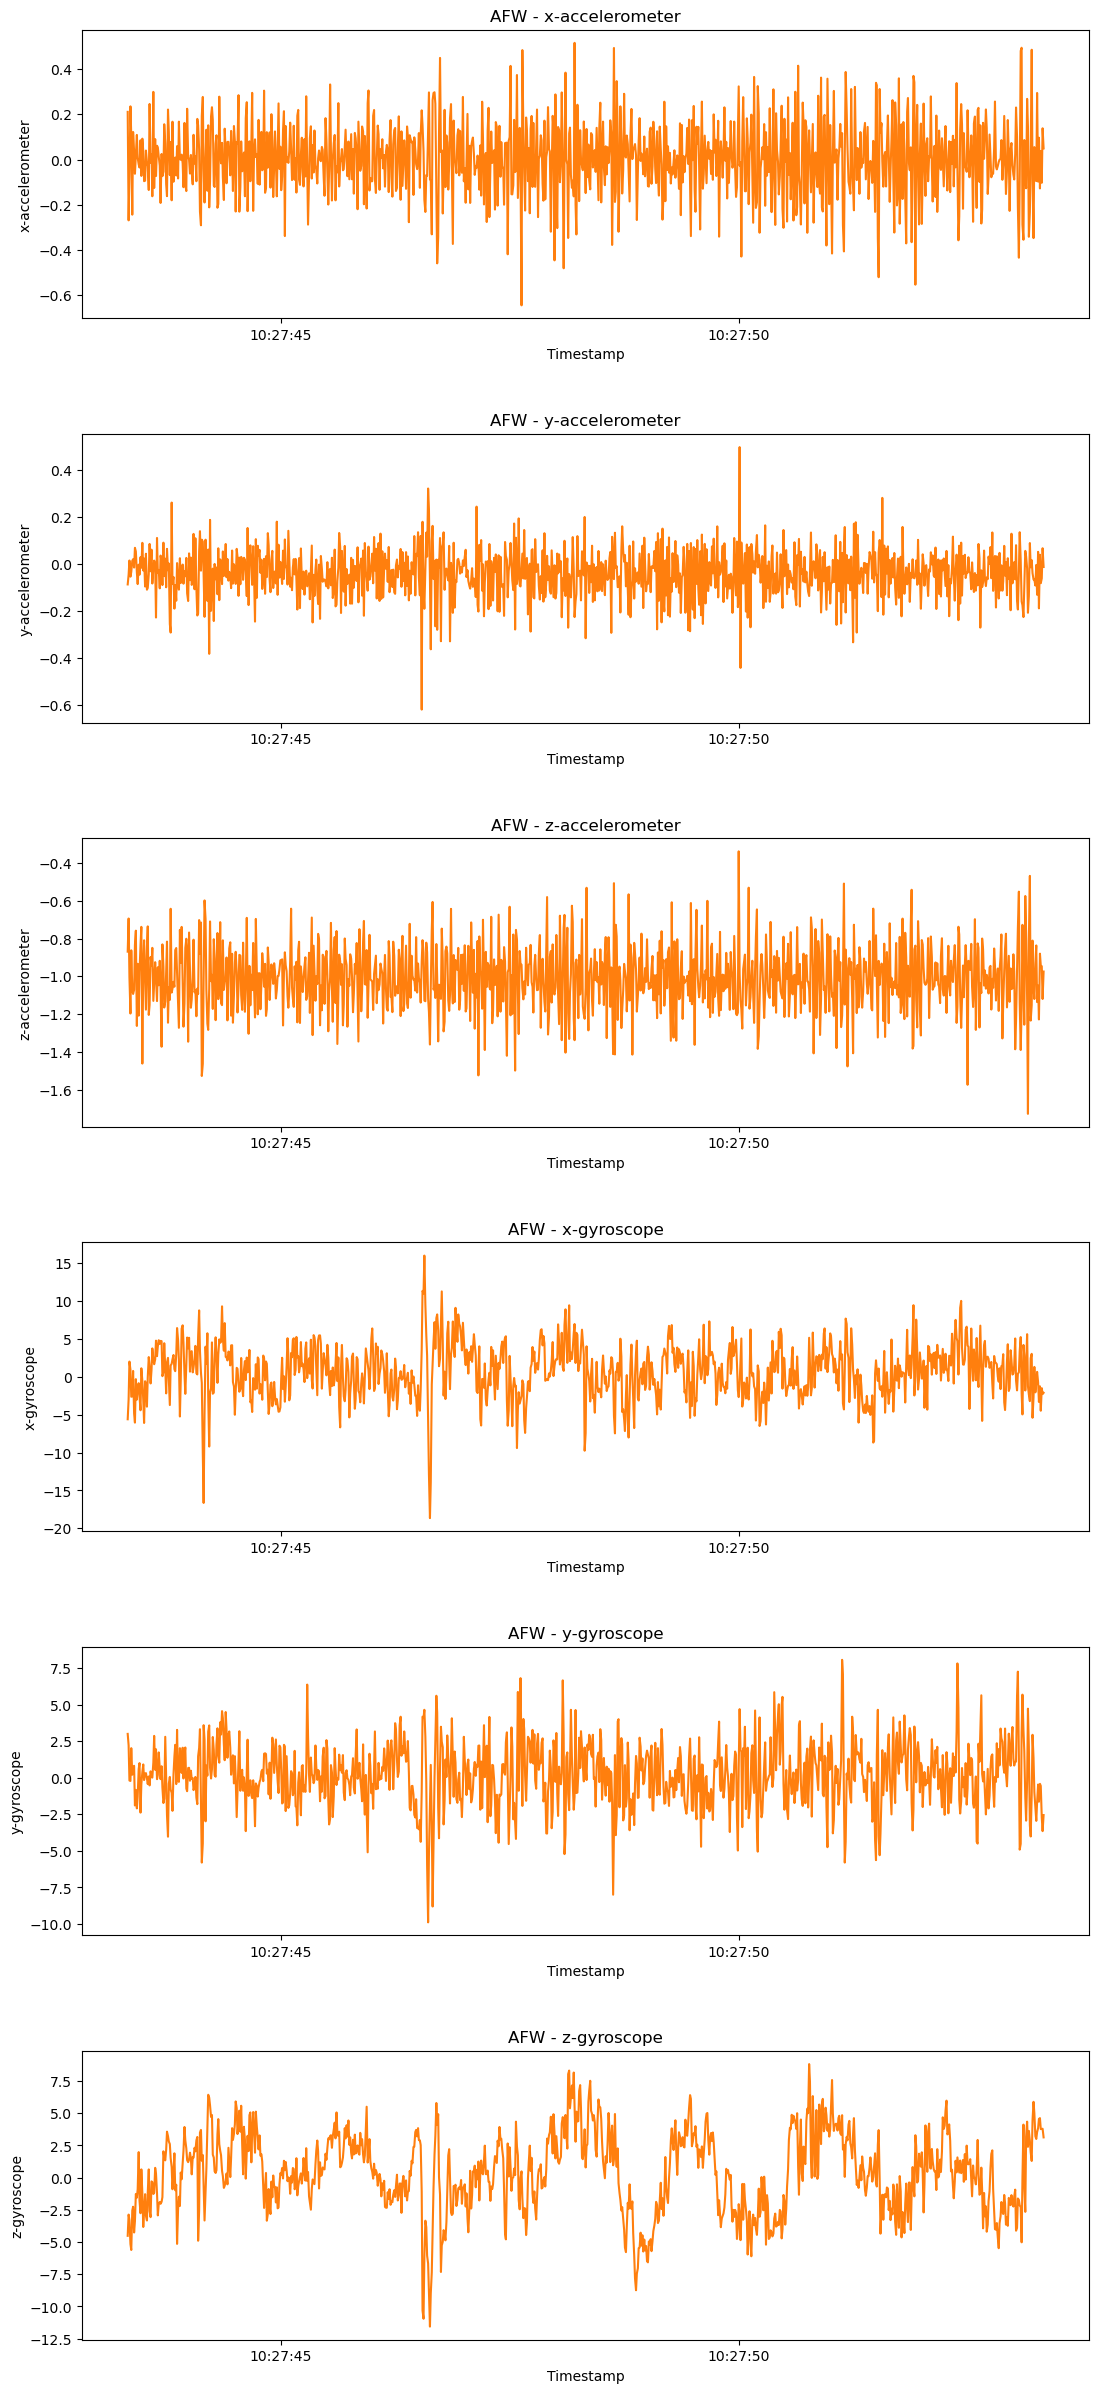

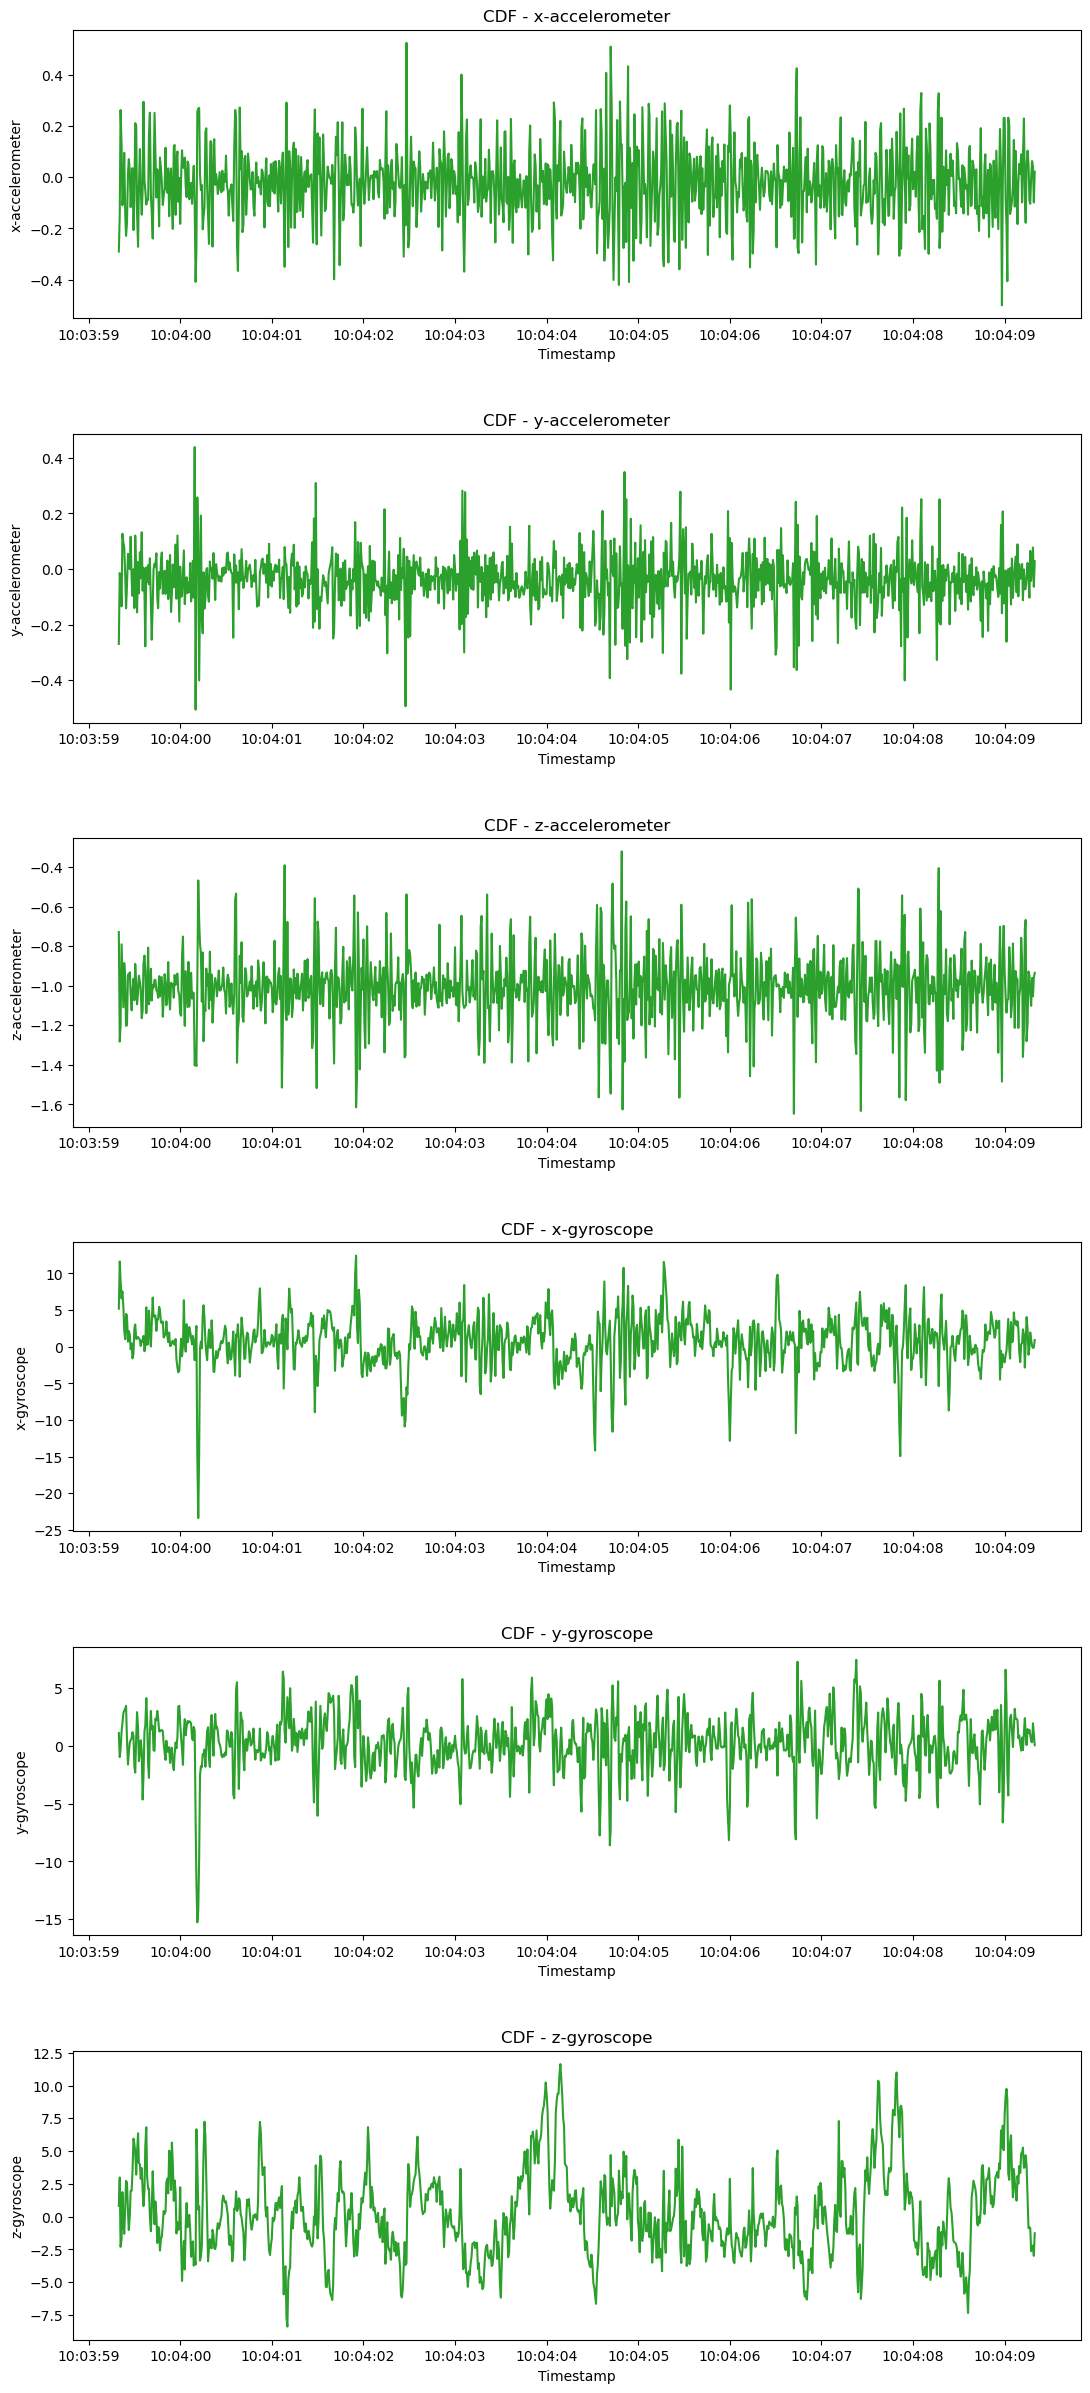

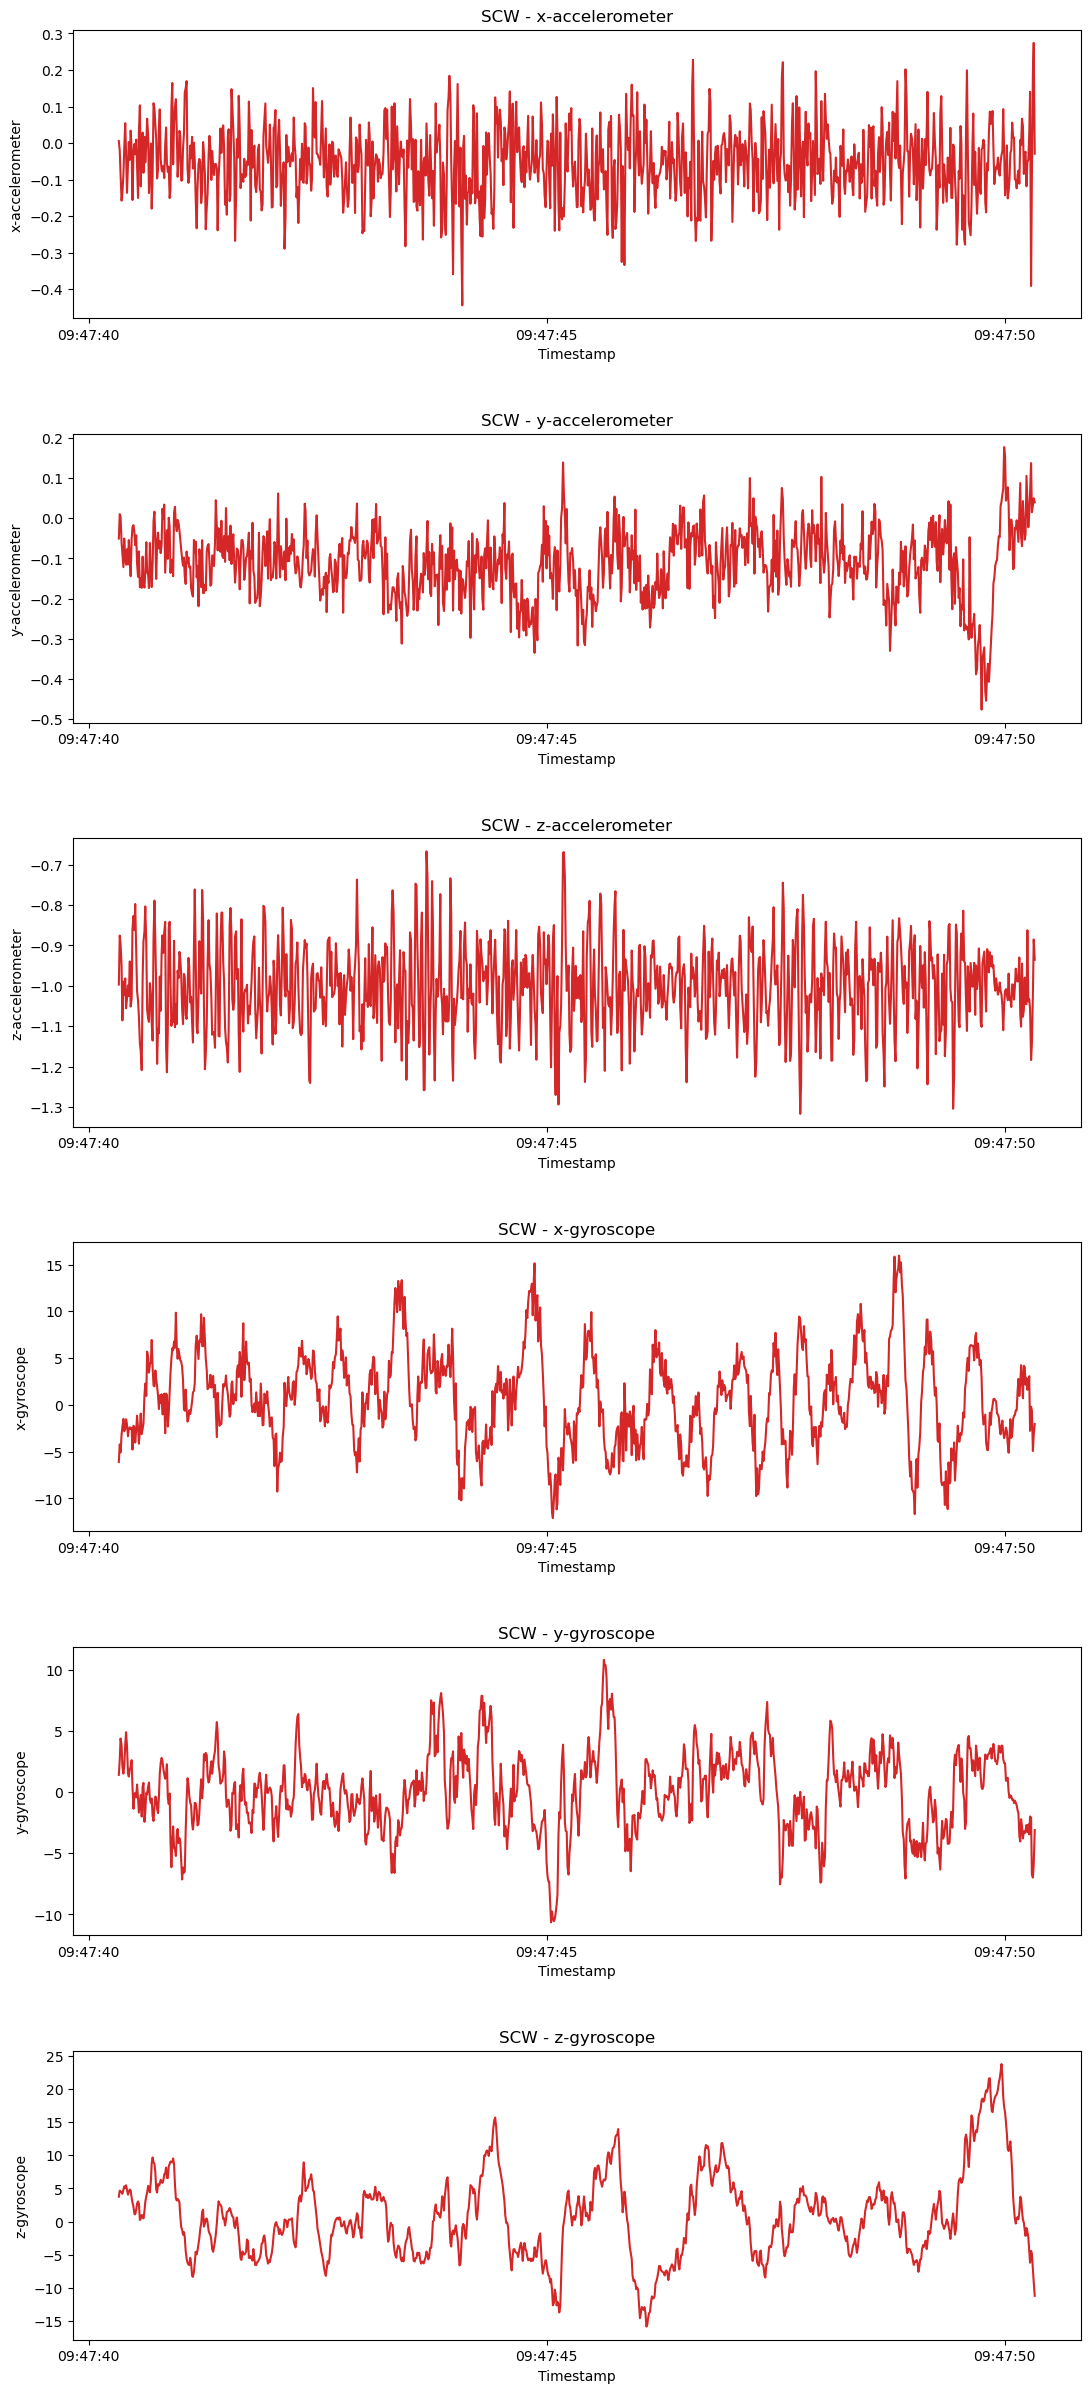

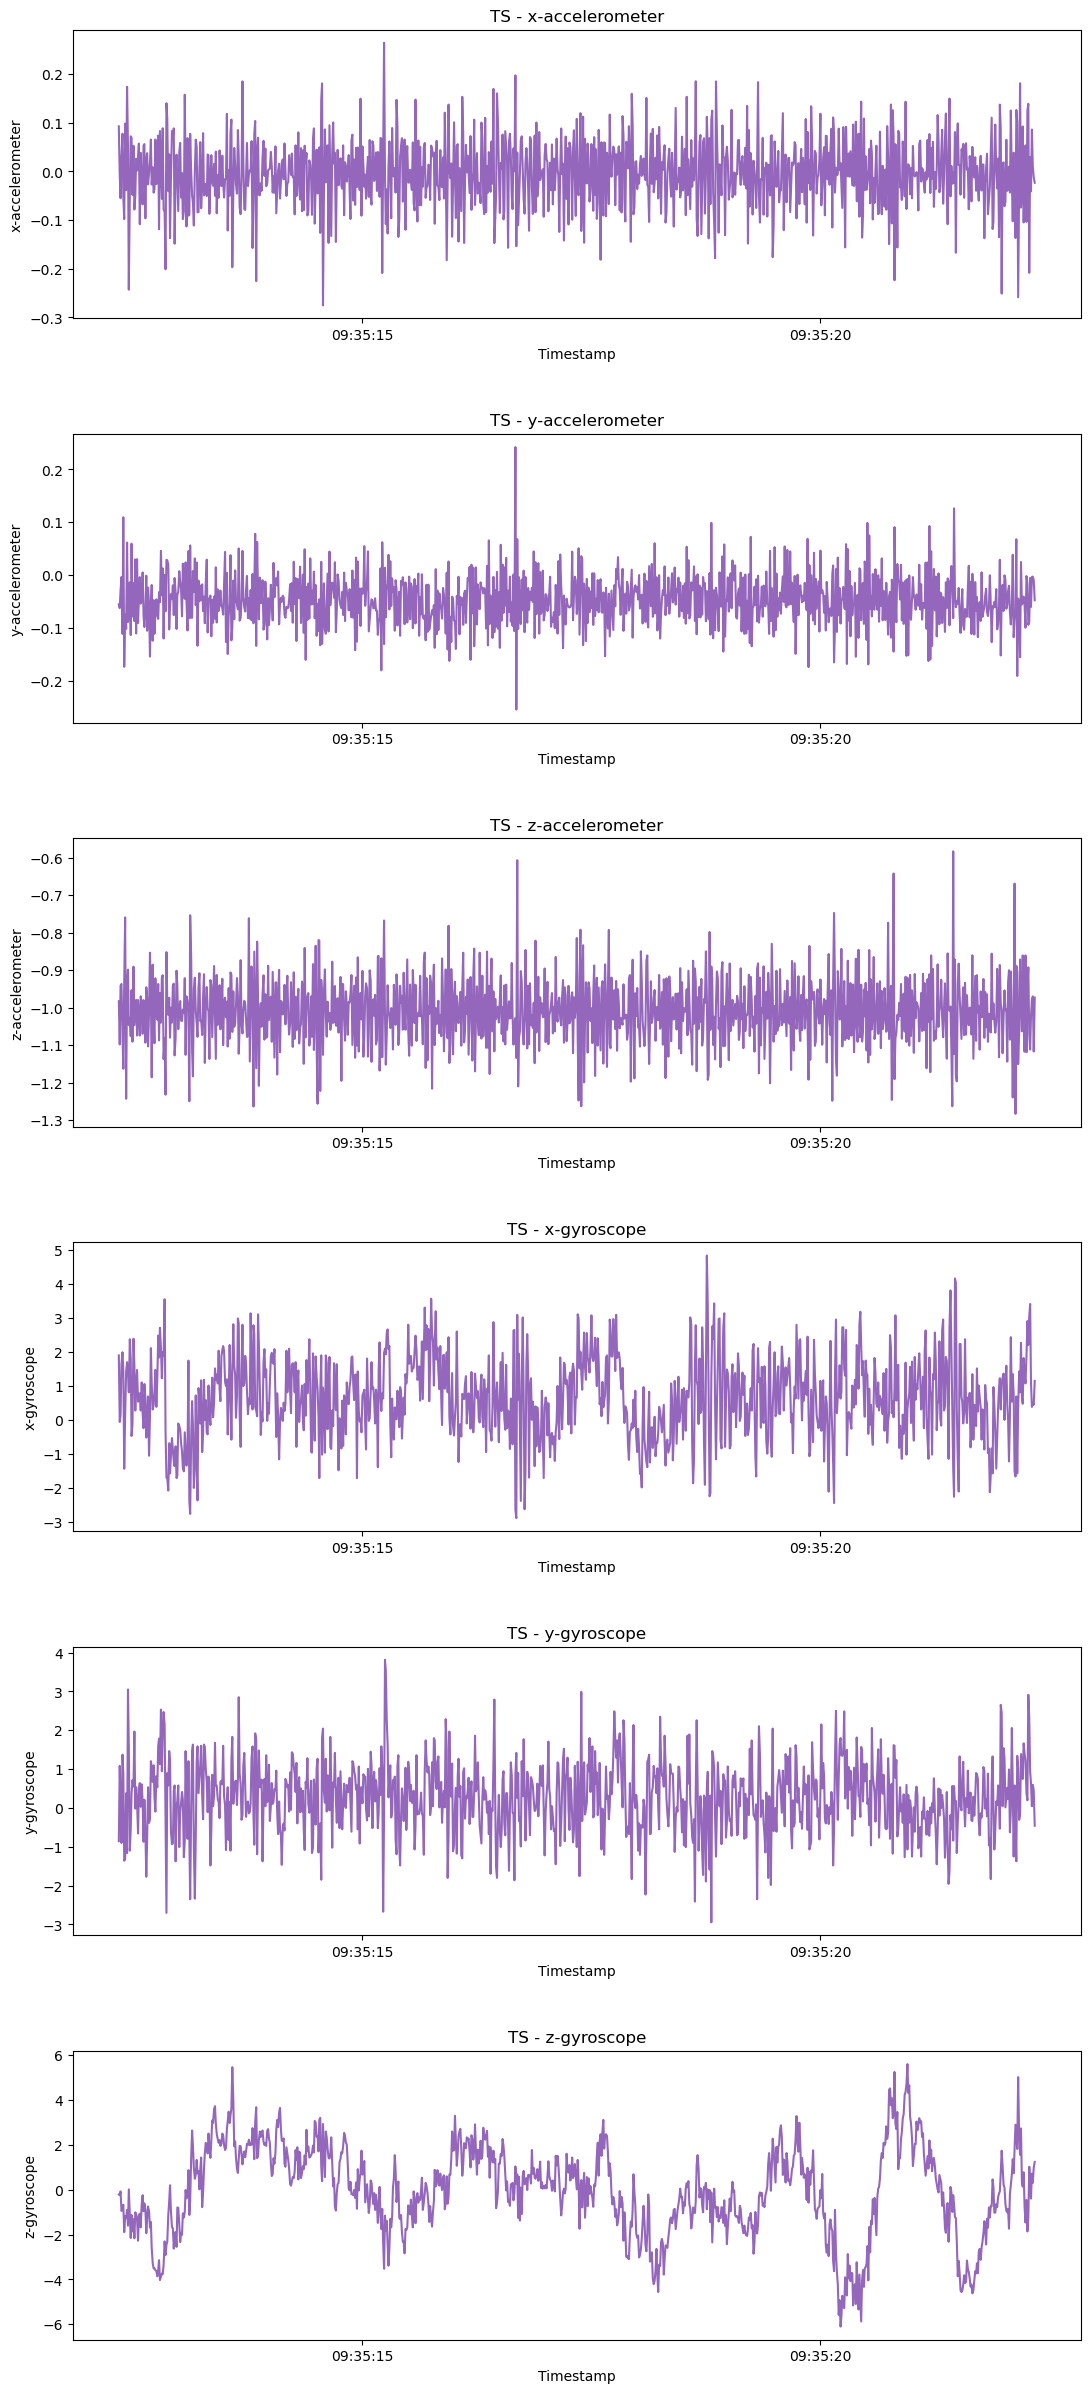

In [27]:
# All plots at once
import matplotlib # For defining color palette

color_palette = matplotlib.colormaps.get_cmap('tab10') # Define a color palette

for color_index, (table_name, table) in enumerate(dict_of_tables_10_seconds.items()):
    fig, ax = plt.subplots(6, 1, figsize=(13, 30), gridspec_kw={'hspace': 0.4})
    
    for i, feature in enumerate(table.columns[1:], 0):  # Skipping the timestamp column:
        color = color_palette(color_index)  # Get color from the palette
        
        ax[i].plot(table['Timestamp'], table[feature], color=color)
        ax[i].set_title(f'{table_name} - {feature}')  # Adding table_name to the title
        ax[i].set_xlabel('Timestamp')
        ax[i].set_ylabel(feature)
    
    plt.show()


#### Section E-10 Box plot

In [28]:
print('The tables are:')
for item, key in dict_of_tables_10_seconds.items():
    print(item)


The tables are:
GSW
AFW
CDF
SCW
TS


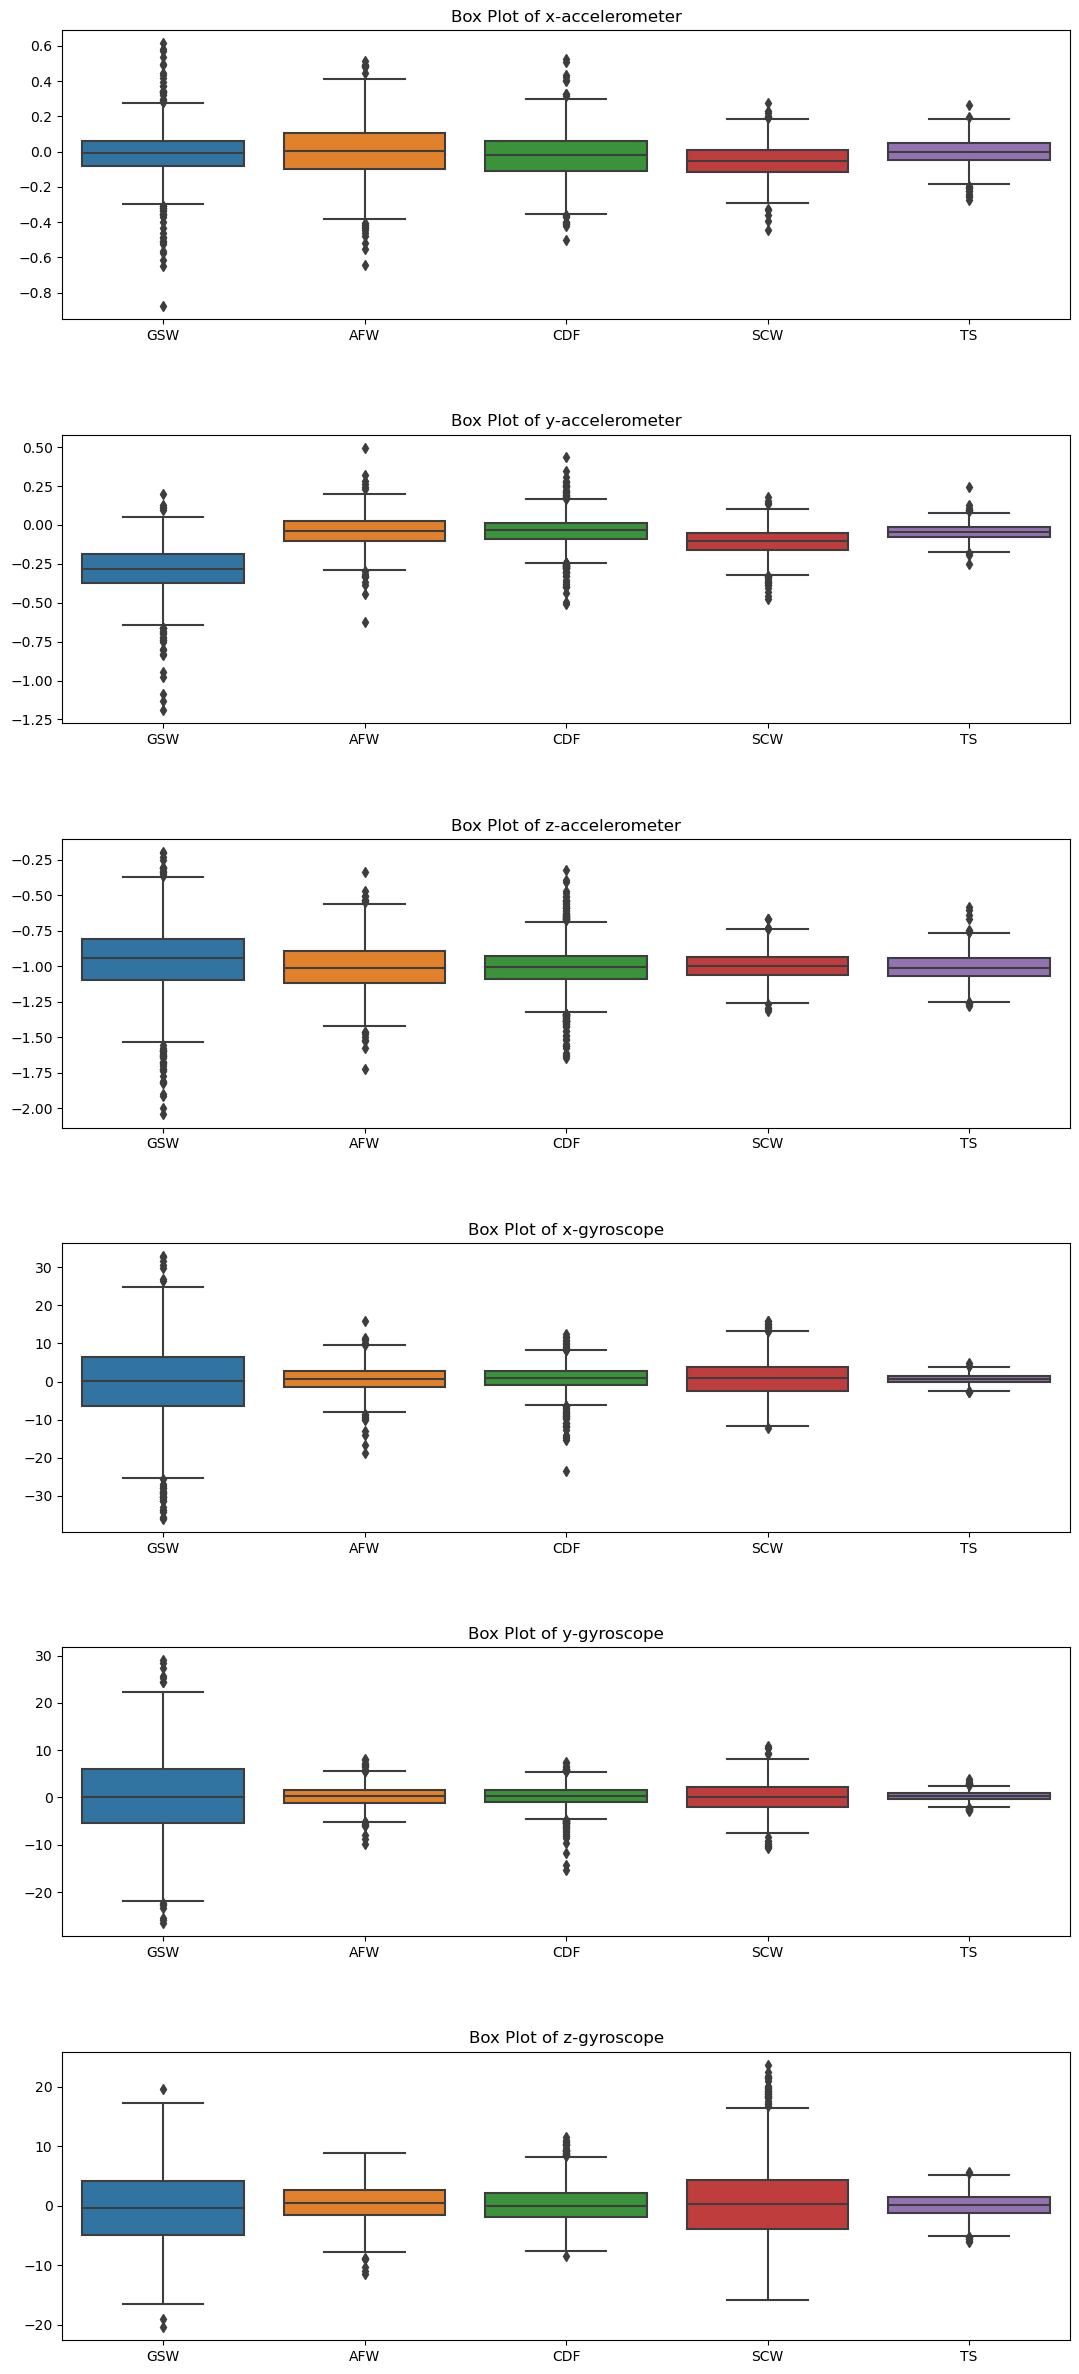

In [29]:
import seaborn as sns  # Importing seaborn for statistical visualization
# Creating a figure and a set of subplots with 6 rows and 1 column, adjusting the figure size and spacing between subplots
fig, ax = plt.subplots(6, 1, figsize=(13, 30), gridspec_kw={'hspace': 0.4})

# Extracting the features to plot from the 'GSW' DataFrame
features_to_plot = dict_of_tables_10_seconds['GSW'].columns[1:]

# Iterating over each feature to plot
for i, feature in enumerate(features_to_plot, 0):
    
    # Creating a DataFrame containing the values of the current feature for each team
    data_to_plot = pd.DataFrame({'GSW': dict_of_tables_10_seconds['GSW'][feature],
                                 'AFW': dict_of_tables_10_seconds['AFW'][feature],
                                 'CDF': dict_of_tables_10_seconds['CDF'][feature],
                                 'SCW': dict_of_tables_10_seconds['SCW'][feature],
                                 'TS': dict_of_tables_10_seconds['TS'][feature]})
    
    # Creating a box plot for the current feature using seaborn, specifying the subplot for plotting
    sns.boxplot(data=data_to_plot, ax=ax[i])
    
    # Setting the x-axis ticks and labels to indicate the teams
    ax[i].set_xticks([0, 1, 2, 3, 4])
    ax[i].set_xticklabels(['GSW', 'AFW', 'CDF', 'SCW', 'TS'])
    
    # Setting the title for the subplot indicating the type of plot and the feature being plotted
    ax[i].set_title(f'Box Plot of {feature}')


## Section F - Data Preprocessing

#### Section F-1 Concatenation and annotation

In [30]:
# Initialize an empty list to store concatenated DataFrames
concatenated_dfs = []

# Iterate through the dictionary of tables
for table_name, table in dict_of_tables.items():
    # Add a new column 'label' with the table name
    table = table.copy() # Make a new copy to mute warnings 
    
    table.loc[:, 'Surface_Type'] = table_name
    # Append the DataFrame to the list
    concatenated_dfs.append(table)

# Concatenate all DataFrames in the list
concatenated_df = pd.concat(concatenated_dfs, ignore_index=True)



In [31]:
concatenated_df.sample(10) # take random 10 rows to check the labels

Timestamp  x-accelerometer  y-accelerometer  \
4675  2024-03-20 10:28:09.710         0.037354        -0.156006   
14160 2024-03-20 09:48:12.920        -0.125977        -0.121094   
1860  2024-03-21 13:47:26.893        -0.293945        -0.463135   
13585 2024-03-20 09:48:07.180         0.022949        -0.177979   
12103 2024-03-20 09:47:52.389        -0.077393        -0.011475   
13787 2024-03-20 09:48:09.195         0.004883         0.054688   
14262 2024-03-20 09:48:13.930        -0.427002        -0.225098   
4521  2024-03-20 10:28:08.180        -0.169189        -0.020264   
11013 2024-03-20 09:47:41.509        -0.196045        -0.058838   
12575 2024-03-20 09:47:57.099        -0.204346        -0.151855   

       z-accelerometer  x-gyroscope  y-gyroscope  z-gyroscope Surface_Type  
4675         -0.994385     2.395630    -2.960205     3.524780          AFW  
14160        -1.111084    -0.762939    11.856078    37.582397          SCW  
1860         -1.148193     5.752563   -10.696410     0.778198          GSW  
13585        -1.164307     3.372192    -9.323120     2.517700          SCW  
12103        -0.943604    -4.043579    -6.622314   -10.116576          SCW  
13787        -0.928223    -3.082275    -0.320435     6.835937          SCW  
14262        -0.851318    -6.759643     9.979248   -16.464233          SCW  
4521         -0.939453     1.632690    -0.061035     4.135132          AFW  
11013        -1.151855     1.907349    -1.205444     1.434326          SCW  
12575        -0.998047    10.803222     3.143310   -11.749267          SCW

/Users/salahkaf/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


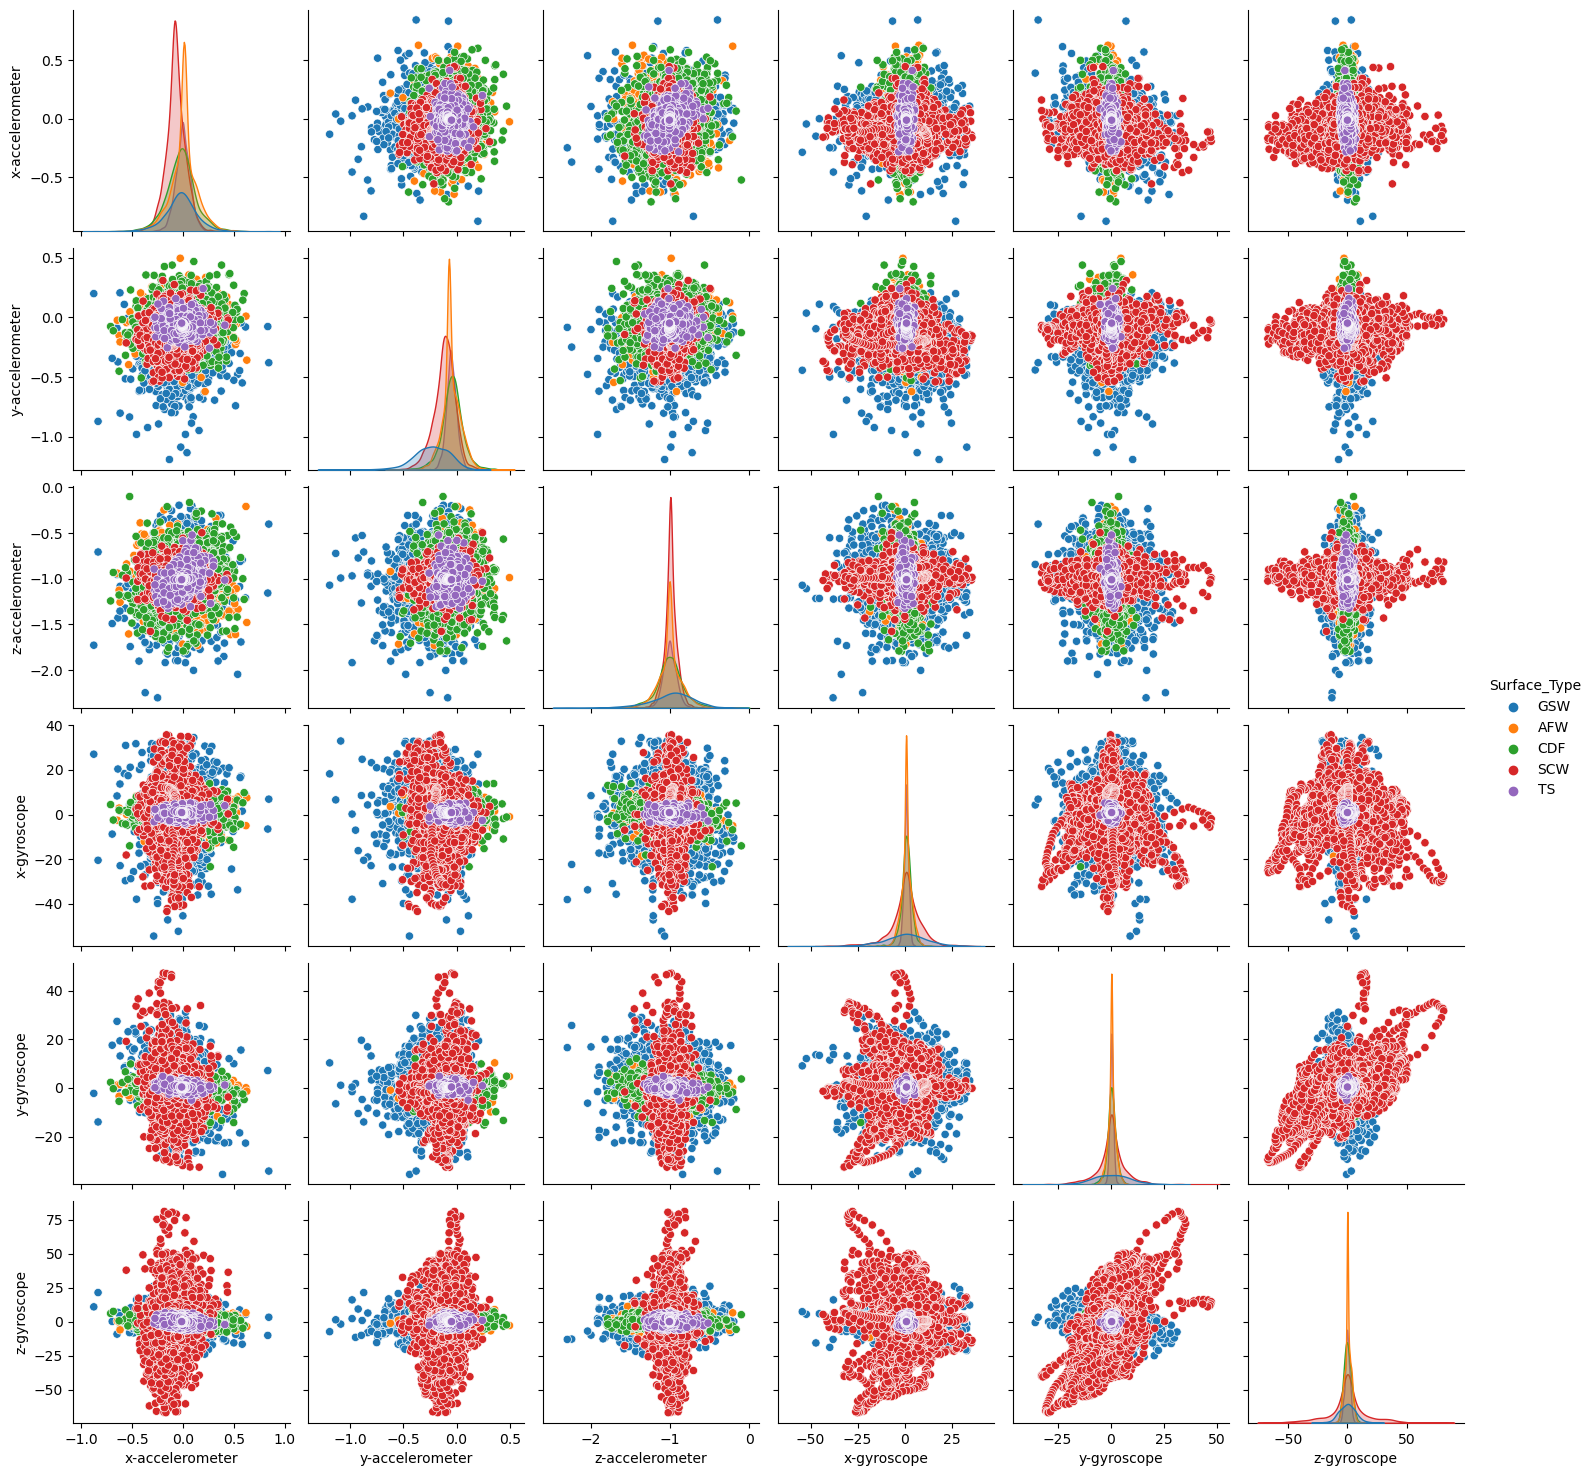

In [32]:
# see the distribtuion of features for each class (Surface)
# import seabron as sns # (if needed)
sns.pairplot(concatenated_df, hue='Surface_Type')
plt.show()
